# Prédire la largeur de sépale en fonction de la longueur de pétale - Régression Polynomiale

In [102]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
dataset=pd.read_csv("iris.csv")

In [104]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<function matplotlib.pyplot.show(close=None, block=None)>

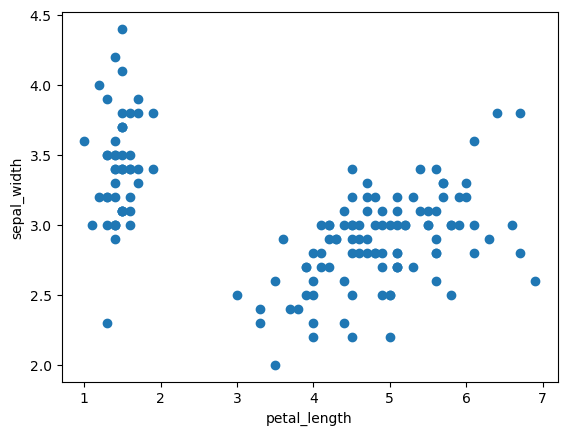

In [105]:
plt.plot(dataset["petal_length"],dataset["sepal_width"],'o')
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
plt.show

In [106]:
y=dataset['sepal_width']

In [107]:
x=dataset['petal_length']

In [108]:
x.shape

(150,)

In [109]:
y.shape

(150,)

In [110]:
x.shape

(150,)

In [111]:
y=dataset.sepal_width.values.reshape(150,1)
y.shape

(150, 1)

In [112]:
x=dataset.petal_length.values.reshape(150,1)

X = np.hstack((x, np.ones((150,1))))

X = np.hstack((x**2, X))

X.shape

(150, 3)

In [113]:
X

array([[ 1.96,  1.4 ,  1.  ],
       [ 1.96,  1.4 ,  1.  ],
       [ 1.69,  1.3 ,  1.  ],
       [ 2.25,  1.5 ,  1.  ],
       [ 1.96,  1.4 ,  1.  ],
       [ 2.89,  1.7 ,  1.  ],
       [ 1.96,  1.4 ,  1.  ],
       [ 2.25,  1.5 ,  1.  ],
       [ 1.96,  1.4 ,  1.  ],
       [ 2.25,  1.5 ,  1.  ],
       [ 2.25,  1.5 ,  1.  ],
       [ 2.56,  1.6 ,  1.  ],
       [ 1.96,  1.4 ,  1.  ],
       [ 1.21,  1.1 ,  1.  ],
       [ 1.44,  1.2 ,  1.  ],
       [ 2.25,  1.5 ,  1.  ],
       [ 1.69,  1.3 ,  1.  ],
       [ 1.96,  1.4 ,  1.  ],
       [ 2.89,  1.7 ,  1.  ],
       [ 2.25,  1.5 ,  1.  ],
       [ 2.89,  1.7 ,  1.  ],
       [ 2.25,  1.5 ,  1.  ],
       [ 1.  ,  1.  ,  1.  ],
       [ 2.89,  1.7 ,  1.  ],
       [ 3.61,  1.9 ,  1.  ],
       [ 2.56,  1.6 ,  1.  ],
       [ 2.56,  1.6 ,  1.  ],
       [ 2.25,  1.5 ,  1.  ],
       [ 1.96,  1.4 ,  1.  ],
       [ 2.56,  1.6 ,  1.  ],
       [ 2.56,  1.6 ,  1.  ],
       [ 2.25,  1.5 ,  1.  ],
       [ 2.25,  1.5 ,  1.  ],
       [ 1

In [114]:
theta = np.random.randn(3, 1)

In [115]:
theta

array([[-0.27923131],
       [ 0.1503599 ],
       [-0.82792308]])

## Modèle linéaire

In [116]:
def model(X, theta):
    return X.dot(theta)

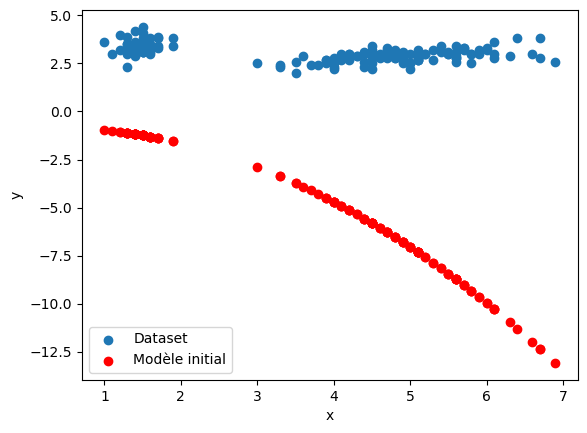

In [117]:
plt.scatter(x,y,label='Dataset')
plt.scatter(x, model(X, theta), c='r',label='Modèle initial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [118]:
#cost function
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [119]:
cost_function(X, y, theta)

37.93637368524126

## Gradient Descent

In [120]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [121]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) 
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) 
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

In [122]:
n_iterations = 3000
learning_rate = 0.001

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [123]:
cost_history[-1]

0.35239069373015236

In [124]:
theta_final

array([[-0.20943599],
       [ 1.56833748],
       [ 0.60342092]])

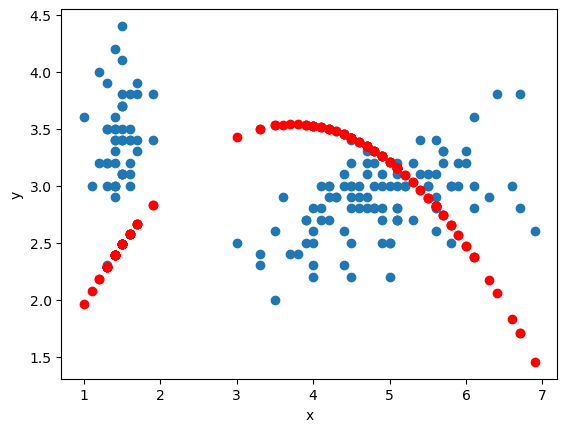

In [125]:
predictions = model(X, theta_final)

plt.scatter(x, y)
plt.scatter(x, predictions, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [126]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [127]:
coef_determination(y, predictions)

-2.7739163133392

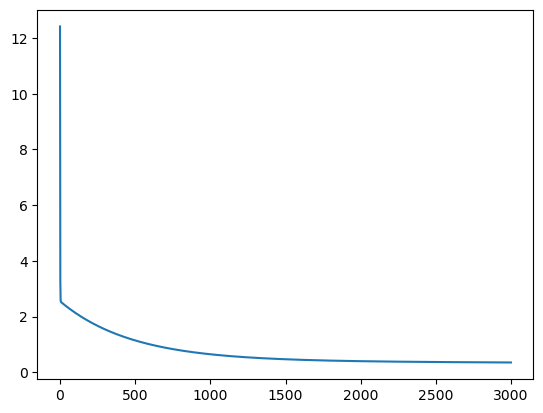

In [128]:
plt.plot(range(n_iterations), cost_history)
plt.show()